In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns=20

In [2]:
df=pd.read_csv('Credit Card Customer Data.csv')
df

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0        1         87073            100000                   2   
1        2         38414             50000                   3   
2        3         17341             50000                   7   
3        4         40496             30000                   5   
4        5         47437            100000                   6   
..     ...           ...               ...                 ...   
655    656         51108             99000                  10   
656    657         60732             84000                  10   
657    658         53834            145000                   8   
658    659         80655            172000                  10   
659    660         80150            167000                   9   

     Total_visits_bank  Total_visits_online  Total_calls_made  
0                    1                    1                 0  
1                    0                   10                 9  
2                    1                    3                 4  
3                    1                    1                 4  
4                    0                   12                 3  
..                 ...                  ...               ...  
655                  1                   10                 0  
656                  1                   13                 2  
657                  1                    9                 1  
658                  1                   15                 0  
659                  0                   12                 2  

[660 rows x 7 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


#### Observations
- There are total of 660 rows and 7 columns
-  All the columns have no null values
- The data type of the columns are int which describes the given data and need not be changed

In [4]:
df.describe()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
count  660.000000    660.000000        660.000000          660.000000   
mean   330.500000  55141.443939      34574.242424            4.706061   
std    190.669872  25627.772200      37625.487804            2.167835   
min      1.000000  11265.000000       3000.000000            1.000000   
25%    165.750000  33825.250000      10000.000000            3.000000   
50%    330.500000  53874.500000      18000.000000            5.000000   
75%    495.250000  77202.500000      48000.000000            6.000000   
max    660.000000  99843.000000     200000.000000           10.000000   

       Total_visits_bank  Total_visits_online  Total_calls_made  
count         660.000000           660.000000        660.000000  
mean            2.403030             2.606061          3.583333  
std             1.631813             2.935724          2.865317  
min             0.000000             0.000000          0.000000  
25%             1.000000             1.000000          1.000000  
50%             2.000000             2.000000          3.000000  
75%             4.000000             4.000000          5.000000  
max             5.000000            15.000000         10.000000

#### Finding the unique values and value counts 

In [5]:
colm=['Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']
print(df.nunique())
for i in colm:
    print(f'unique values for {i} :',df[i].unique())
    print()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64
unique values for Total_Credit_Cards : [ 2  3  7  5  6  4  1  9  8 10]

unique values for Total_visits_bank : [1 0 2 5 3 4]

unique values for Total_visits_online : [ 1 10  3 12 11  2  5  4  0 14  7 13 15  6  8  9]

unique values for Total_calls_made : [ 0  9  4  3  8  2  1  7  5  6 10]



In [6]:
colm=['Customer Key','Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']
for i in colm:
    print(f'value counts {i}',df[i])

value counts Customer Key 0      87073
1      38414
2      17341
3      40496
4      47437
       ...  
655    51108
656    60732
657    53834
658    80655
659    80150
Name: Customer Key, Length: 660, dtype: int64
value counts Avg_Credit_Limit 0      100000
1       50000
2       50000
3       30000
4      100000
        ...  
655     99000
656     84000
657    145000
658    172000
659    167000
Name: Avg_Credit_Limit, Length: 660, dtype: int64
value counts Total_Credit_Cards 0       2
1       3
2       7
3       5
4       6
       ..
655    10
656    10
657     8
658    10
659     9
Name: Total_Credit_Cards, Length: 660, dtype: int64
value counts Total_visits_bank 0      1
1      0
2      1
3      1
4      0
      ..
655    1
656    1
657    1
658    1
659    0
Name: Total_visits_bank, Length: 660, dtype: int64
value counts Total_visits_online 0       1
1      10
2       3
3       1
4      12
       ..
655    10
656    13
657     9
658    15
659    12
Name: Total_visits_online, Length

### EDA 

In [7]:
## Droping Sl_No, Customer Key as they do not add any value

df.drop(['Sl_No','Customer Key'],axis=1,inplace=True)

#### Univarient Analysis

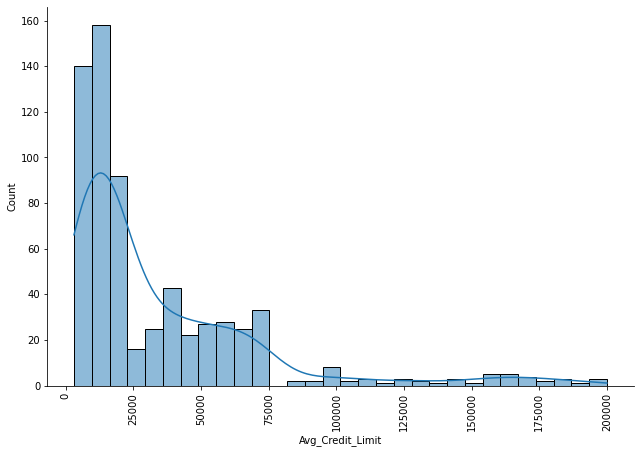

In [8]:
sns.displot(data=df,x=df['Avg_Credit_Limit'],bins=30,kde=True,height=6,aspect=1.5)
plt.xticks(rotation=90)
plt.show()

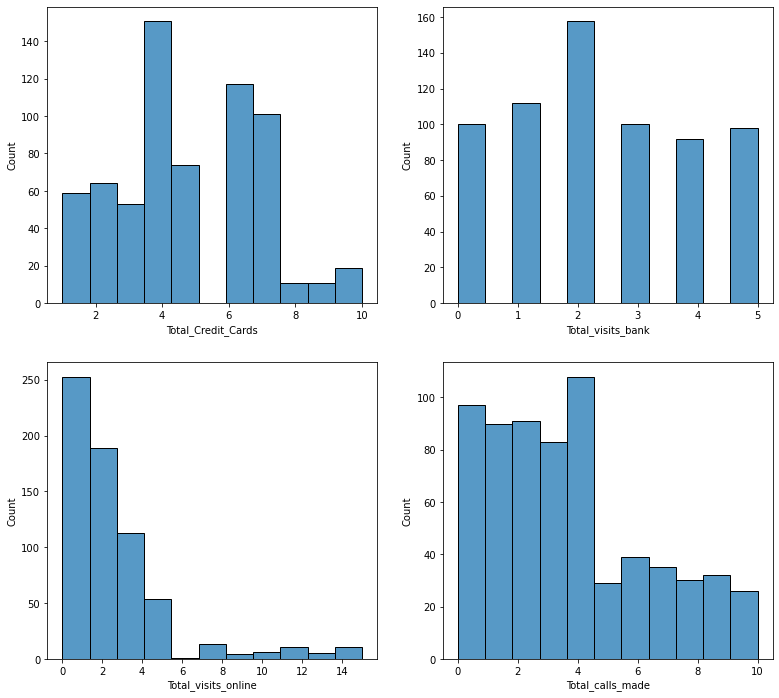

In [9]:
c=['Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']

fig, ax = plt.subplots(nrows = 2,ncols =2,figsize = (13,12))
for i in range(len(c)):
    plt.subplot(2,2,i+1)
    sns.histplot(data=df,x=df[c[i]],bins=11)

#### Obserbvations :
- The distribution of average_credit_limit is highly skewed
- Total_visits onlins and total_calls_made are also skewed
- The blank bins indicate that there maybe mising values and needs to be treated

#### BIVARIENT

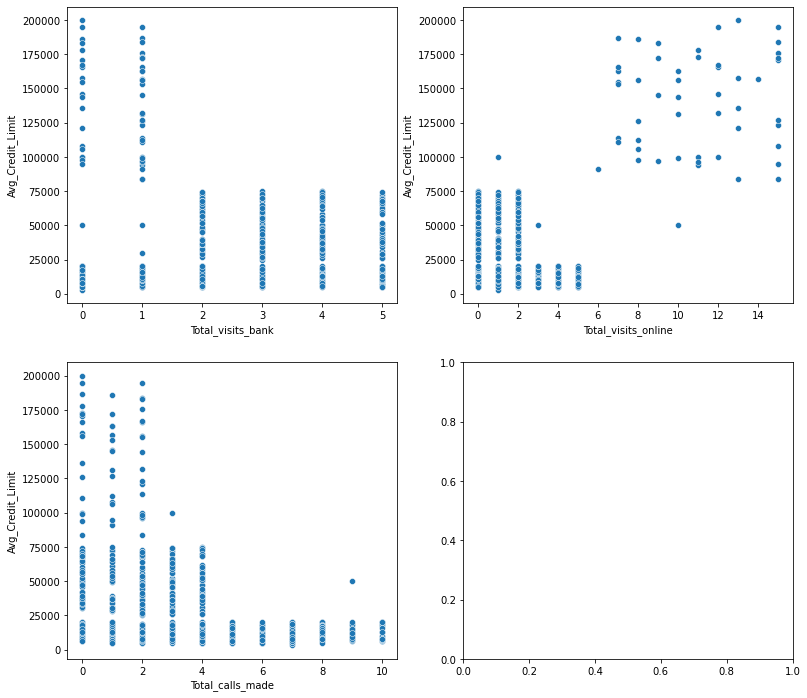

In [10]:
c=['Total_visits_bank','Total_visits_online','Total_calls_made']

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(13,12))
for i in range(len(c)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=df[c[i]],y=df['Avg_Credit_Limit'],data=df)

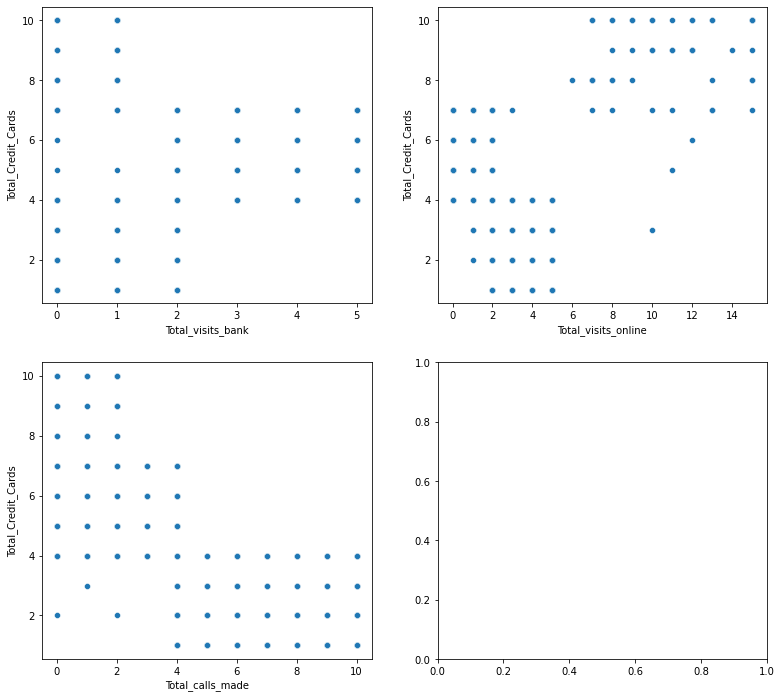

In [11]:
c=['Total_visits_bank','Total_visits_online','Total_calls_made']

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(13,12))
for i in range(len(c)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=df[c[i]],y=df['Total_Credit_Cards'],data=df)

#### Observations:
- The most visits to bank is done by those having lower avg credit limit and there is clear cluster for total credit cards
- Most online visits is done by those having higher avg credit limit and there is clear cluster for total credit cards
- The calls made distribution are done by those having avg credit lower and also there is clear cluster for total credit cards

#### MULTIVARIENT

<AxesSubplot:>

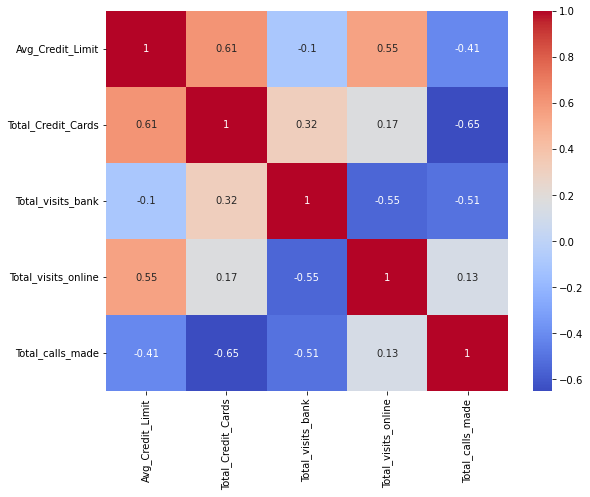

In [12]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

#### Observation
- Avg credit limit has strong positive correlation  total online visits and total credit cards 
- total calls made has strong negative correlation with  and 

## Data Preprocessing

- Total interactions can be formed by summation of Total visits bank, visits online,calls made

In [13]:
df['Total_interactions'] = df['Total_visits_bank'] + df['Total_visits_online'] + df['Total_calls_made']

In [14]:
df.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
Total_interactions     0
dtype: int64

- There are no missing values present

### Outlier analysis

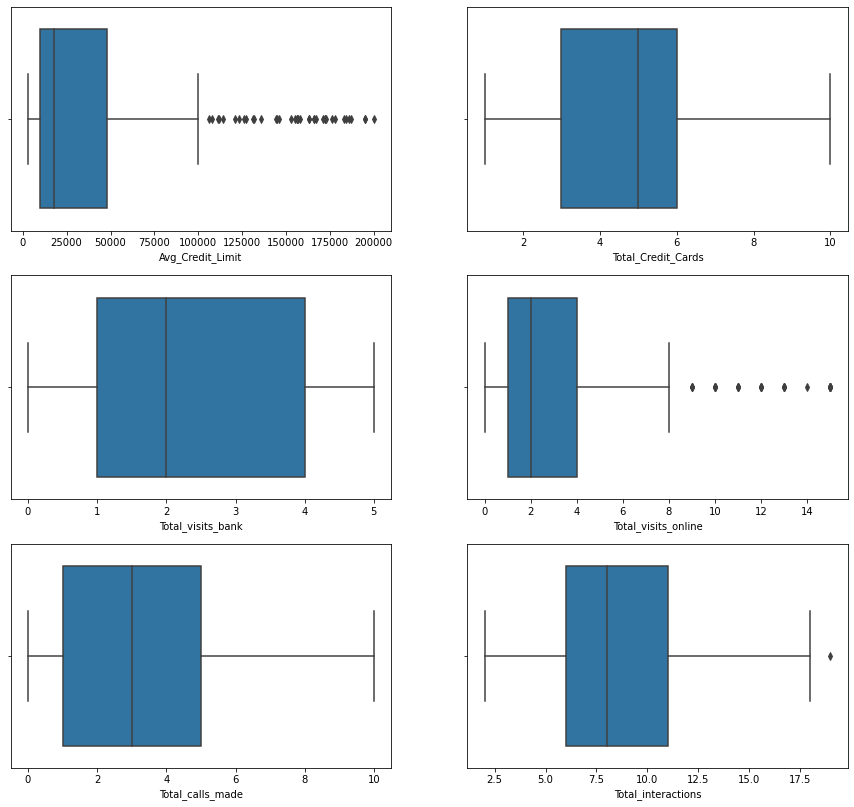

In [15]:
cols=['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made','Total_interactions']

fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(15,14))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=df[cols[i]])

- There are many outliers present for avg credit limit i.r there are many customers present who have higher limit and can be used for further analysis
- The total visits online outliers can be removed

In [16]:
q1=df['Total_visits_online'].quantile(.25)
q3=df['Total_visits_online'].quantile(.75)
iqr=q3-q1
ll=q1-iqr*1.5
ul=q3+iqr*1.5
df.loc[df['Total_visits_online']<ll,'Total_visits_online']=ll
df.loc[df['Total_visits_online']>ul,'Total_visits_online']=ul

<AxesSubplot:xlabel='Total_visits_online'>

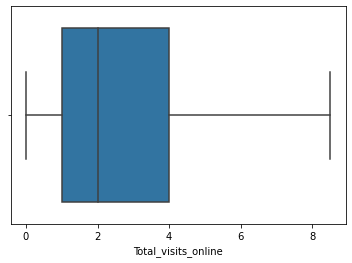

In [17]:
sns.boxplot(x=df['Total_visits_online'])

- Outliers for Total_visits_online has been removed

### Scaling the data

In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_scaled=ss.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled)

In [19]:
df_scaled.head(5)

0         1         2         3         4         5
0  1.740187 -1.249225 -0.860451 -0.619767 -1.251537 -1.935936
1  0.410293 -0.787585 -1.473731  2.705813  1.891859  3.056296
2  0.410293  1.058973 -0.860451  0.267054  0.145528 -0.173972
3 -0.121665  0.135694 -0.860451 -0.619767  0.145528 -0.761293
4  1.740187  0.597334 -1.473731  2.705813 -0.203739  1.881653

### Hierarchical clustring

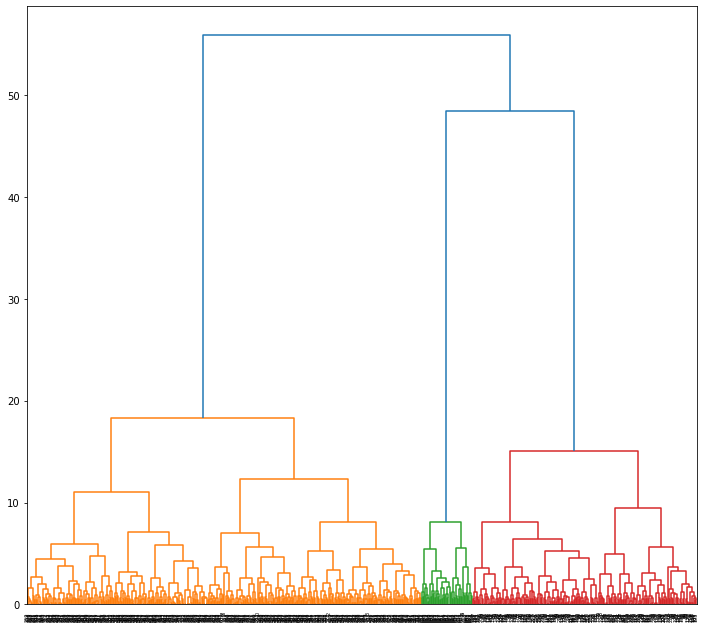

In [20]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(12,11))
dend=shc.dendrogram(shc.linkage(df_scaled,method='ward'))

#### from the diagram no of clusters can be taken as 3

In [21]:
from sklearn.cluster import AgglomerativeClustering

cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean')
y_hc=cluster.fit_predict(df_scaled)

In [22]:
cluster_yhc=pd.DataFrame(y_hc,columns=['cluster'])

df=pd.concat([df,cluster_yhc],axis=1)
df

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0              100000                   2                  1   
1               50000                   3                  0   
2               50000                   7                  1   
3               30000                   5                  1   
4              100000                   6                  0   
..                ...                 ...                ...   
655             99000                  10                  1   
656             84000                  10                  1   
657            145000                   8                  1   
658            172000                  10                  1   
659            167000                   9                  0   

     Total_visits_online  Total_calls_made  Total_interactions  cluster  
0                    1.0                 0                   2        0  
1                    8.5                 9                  19        1  
2                    3.0                 4                   8        0  
3                    1.0                 4                   6        0  
4                    8.5                 3                  15        2  
..                   ...               ...                 ...      ...  
655                  8.5                 0                  11        2  
656                  8.5                 2                  16        2  
657                  8.5                 1                  11        2  
658                  8.5                 0                  16        2  
659                  8.5                 2                  14        2  

[660 rows x 7 columns]

### Visualisation

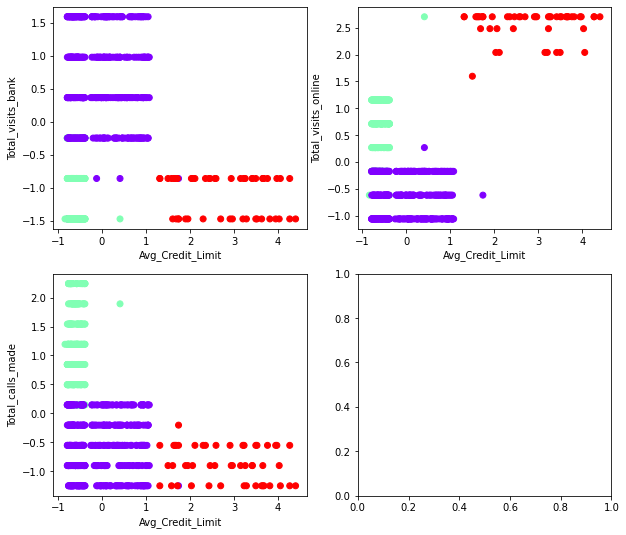

In [23]:
cols=['Total_visits_bank','Total_visits_online','Total_calls_made']

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,9))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    plt.scatter(df_scaled.iloc[:,0],df_scaled.iloc[:,i+2],c=cluster.labels_,cmap='rainbow')
    plt.xlabel('Avg_Credit_Limit')
    plt.ylabel(cols[i])


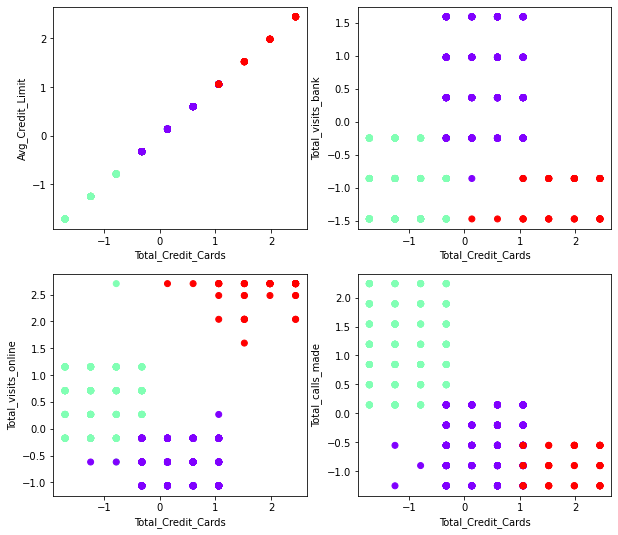

In [24]:
cols=['Avg_Credit_Limit','Total_visits_bank','Total_visits_online','Total_calls_made']

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,9))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    plt.scatter(df_scaled.iloc[:,1],df_scaled.iloc[:,i+1],c=cluster.labels_,cmap='rainbow')
    plt.xlabel('Total_Credit_Cards')
    plt.ylabel(cols[i])

<AxesSubplot:xlabel='cluster', ylabel='Avg_Credit_Limit'>

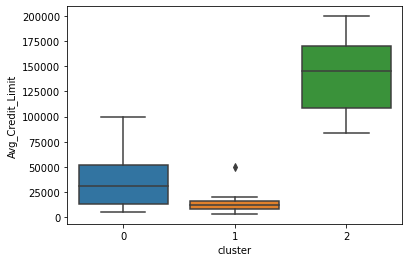

In [25]:
sns.boxplot(x='cluster',y='Avg_Credit_Limit',data=df)

<AxesSubplot:xlabel='cluster', ylabel='Total_Credit_Cards'>

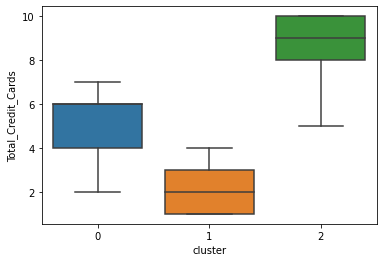

In [26]:
sns.boxplot(x='cluster',y='Total_Credit_Cards',data=df)

<AxesSubplot:xlabel='cluster', ylabel='Total_visits_bank'>

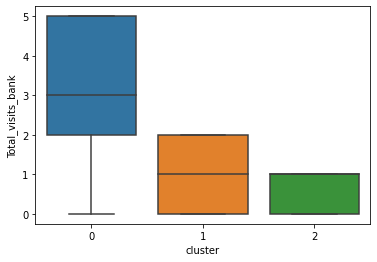

In [27]:
sns.boxplot(x='cluster',y='Total_visits_bank',data=df)

<AxesSubplot:xlabel='cluster', ylabel='Total_visits_online'>

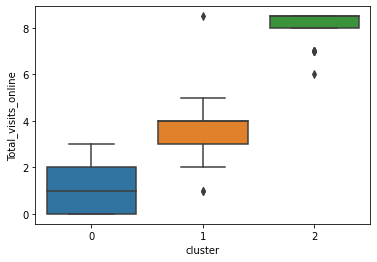

In [28]:
sns.boxplot(x='cluster',y='Total_visits_online',data=df)

<AxesSubplot:xlabel='cluster', ylabel='Total_calls_made'>

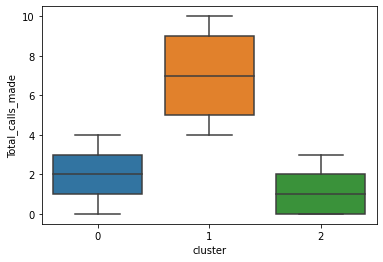

In [29]:
sns.boxplot(x='cluster',y='Total_calls_made',data=df)

#### Observations
- The above visuals indicate customer segmentation based on 3 clusters against the features
- Cluster 2 has the highest customer with high average credit score with more credit cards, cluster 1 has least average credit     score with less credit cards
- Cluster 2 customers contact mostly through online with least bank visits and calls made, indicating premium class of customers
- Cluster 1 has the most contact through calls made, frequent calls from bank will help to retain and form marketing strategy     based on it
- Cluster 0 indicate the customers do not spend more than necessary and visit banks the most, they could be targeted the most to   increase their spending and convert percent of this customers into premium customers and generate more profits
- Cluster 0 customer experience can be increased by their interaction with the manager or the head as they tend to visit the       banks most
- Cluster 2 customers as always can be targeted for higher profits and their online user experience should be improved with       extra features and clean UI to manage cards.

#### Silhouette score

In [30]:
from sklearn.metrics import silhouette_score
sil_hc=silhouette_score(df_scaled,y_hc)
sil_hc

0.5136547355552942

### K-means clustring

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


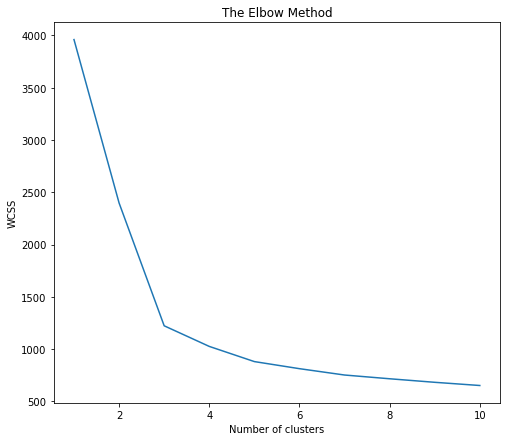

In [31]:
from sklearn.cluster import KMeans

plt.figure(figsize=(8,7))
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit_predict(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### No of clusters can be taken as 3 where there is sharp change in elbow curve

In [32]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(df_scaled)
y_kmeans

df_ykmeans=pd.DataFrame(y_kmeans,columns=['cluster_km'])
df_copy=df.copy()

In [33]:
df_copy=pd.concat([df_copy,df_ykmeans],axis=1)


### Visualisation

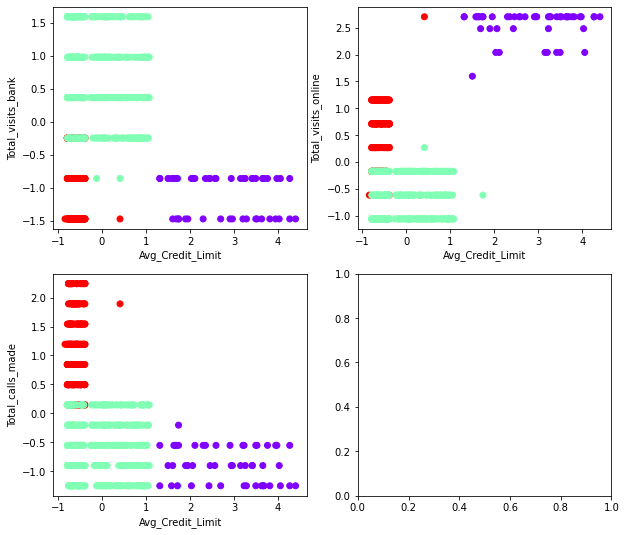

In [34]:
cols=['Total_visits_bank','Total_visits_online','Total_calls_made']

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,9))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    plt.scatter(df_scaled.iloc[:,0],df_scaled.iloc[:,i+2],c=kmeans.labels_,cmap='rainbow')
    plt.xlabel('Avg_Credit_Limit')
    plt.ylabel(cols[i])

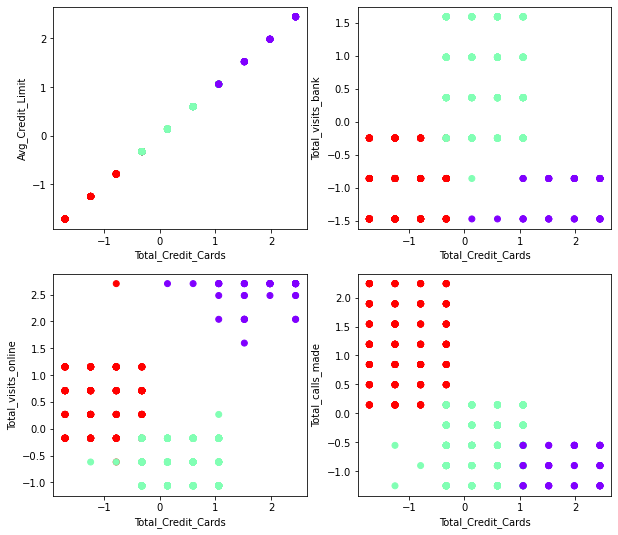

In [35]:
cols=['Avg_Credit_Limit','Total_visits_bank','Total_visits_online','Total_calls_made']

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,9))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    plt.scatter(df_scaled.iloc[:,1],df_scaled.iloc[:,i+1],c=kmeans.labels_,cmap='rainbow')
    plt.xlabel('Total_Credit_Cards')
    plt.ylabel(cols[i])

<AxesSubplot:xlabel='cluster_km', ylabel='Avg_Credit_Limit'>

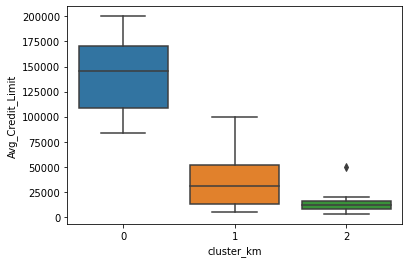

In [36]:
sns.boxplot(x='cluster_km',y='Avg_Credit_Limit',data=df_copy)

<AxesSubplot:xlabel='cluster_km', ylabel='Total_Credit_Cards'>

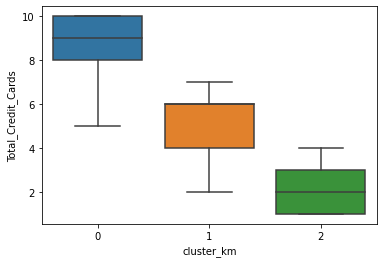

In [37]:
sns.boxplot(x='cluster_km',y='Total_Credit_Cards',data=df_copy)

<AxesSubplot:xlabel='cluster_km', ylabel='Total_visits_bank'>

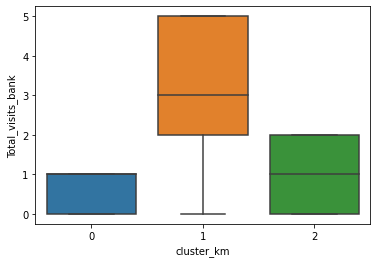

In [38]:
sns.boxplot(x='cluster_km',y='Total_visits_bank',data=df_copy)

<AxesSubplot:xlabel='cluster_km', ylabel='Total_visits_online'>

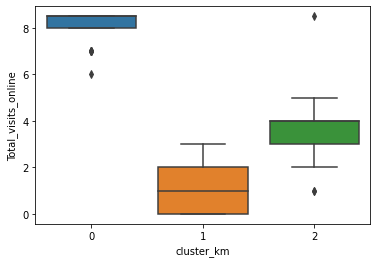

In [39]:
sns.boxplot(x='cluster_km',y='Total_visits_online',data=df_copy)

<AxesSubplot:xlabel='cluster_km', ylabel='Total_calls_made'>

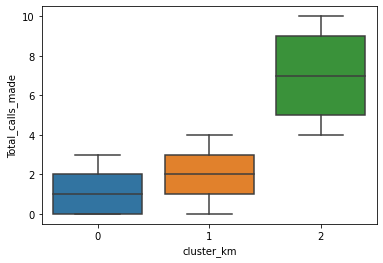

In [40]:
sns.boxplot(x='cluster_km',y='Total_calls_made',data=df_copy)

#### Observations
- The above visuals indicate customer segmentation based on 3 clusters against the features
- Cluster 0 has the highest customer with high average credit score with more credit cards, cluster 2 has least average credit     score with less credit cards
- Cluster 0 customers contact mostly through online with least bank visits and calls made, indicating premium class of customers
- Cluster 2 has the most contact through calls made, frequent calls from bank will help to retain and form marketing strategy     based on it
- Cluster 1 indicate the customers do not spend more than necessary and visit banks the most, they could be targeted the most to   increase their spending and convert percent of this customers into premium customers and generate more profits
- Cluster 1 customer experience can be increased by their interaction with the manager or the head as they tend to visit the       banks most
- Cluster 0 customers as always can be targeted for higher profits and their online user experience should be improved with       extra features and clean UI to manage cards.

#### Silhouette score

In [41]:
from sklearn.metrics import silhouette_score
sil_hc=silhouette_score(df_scaled,y_kmeans)
sil_hc

0.5136547355552942

### Conclusions

- Both Hierarchical clustring and Kmeans clustring produce similar results.
- The Silhouette score for both the methods are same and are in the range of 0-1 whcih indicates the clusters are not             overlapping and there are clear segments.
- Hence any of the above methods can be used for clustring for further predictions.